### Casual weaseling

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import os

/usr/local/lib/python2.7/dist-packages/matplotlib-1.5.1-py2.7-linux-x86_64.egg/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Load data 

In [3]:
X = np.load("/homeappl/home/austyuzh/data/dae.data.npy")

(9239, 1, 100, 100)


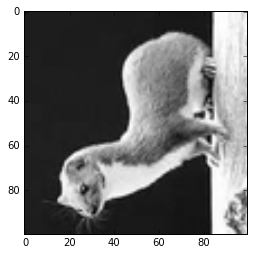

In [11]:
print X.shape
plt.imshow(X[1000,0],cmap='gray')

# Train and test

In [16]:

train_size = (len(X)*5)/6


In [17]:
X_train = y_train = X[:train_size]
X_val = y_val = X[train_size:]

print "train shapes X:", X_train.shape
print "train shapes X:", X_val.shape



train shapes X: (7699, 1, 100, 100)
train shapes X: (1540, 1, 100, 100)


### Lasagne part

In [14]:
import theano
import theano.tensor as T
import lasagne


input_X = T.tensor4("X cat/dog image")
target_y = <What is our target?>

#input size, None means "arbitrary
input_shape = [None] + list(X.shape[1:])




/usr/local/lib/python2.7/dist-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [ ]:
#Input layer
input_layer = lasagne.layers.InputLayer(shape = input_shape,input_var=input_X)


<Architecture>

#
dense_output = <output layer>

In [ ]:
#get prediction
y_predicted = ...

In [ ]:
#all weights
all_weights = lasagne.layers.get_all_params(dense_output,trainable=True)
print all_weights

In [ ]:
#loss function
loss = lasagne.objectives.squared_error(y_predicted,target_y).mean()

#maybe regularize

#updates
updates_sgd = <your favorite optimizer>



In [ ]:


#train function step
train_fun = theano.function([input_X,target_y],[loss],updates= updates_sgd)




### Training loop

In [ ]:
#Old friend
def iterate_minibatches(inputs, targets, batchsize):
    assert len(inputs) == len(targets)
    indices = np.arange(len(inputs))
    np.random.shuffle(indices)
    for start_idx in range(0, len(inputs) - batchsize + 1, batchsize):
        excerpt = indices[start_idx:start_idx + batchsize]
        yield inputs[excerpt], targets[excerpt]

In [ ]:
#training

num_epochs = <how many epochs>

batch_size = <pictures per minibatch>

for epoch in range(num_epochs):
    # In each epoch, we do a full pass over the training data:
    train_err = 0
    train_batches = 0
    start_time = time.time()
    for batch in iterate_minibatches(X_train, y_train,batch_size):
        inputs, targets = batch
        train_err_batch= train_fun(inputs, targets)
        train_err += train_err_batch
        train_batches += 1


    
    # Then we print the results for this epoch:
    print("Epoch {} of {} took {:.3f}s".format(
        epoch + 1, num_epochs, time.time() - start_time))

    print("  training loss (in-iteration):\t\t{:.6f}".format(train_err / train_batches))
    print("  train accuracy:\t\t{:.2f} %".format(
        train_acc / train_batches * 100))
    print("  validation accuracy:\t\t{:.2f} %".format(
        val_acc / val_batches * 100))

# UseIT
Compile a function that returns reconstructed image given original image.
Use it on several random weasels